dominant frequency 0.09061488673139159 cycles/year
dominant period 11.035714285714285 years


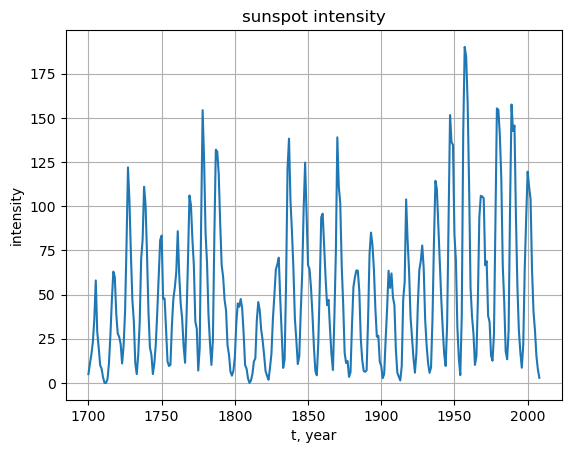

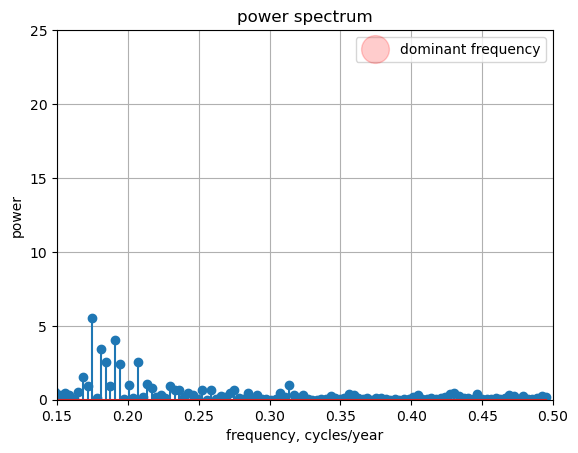

In [1]:
from pylab import *
sunspot = loadtxt('./data/sunspots.csv', delimiter=',', skiprows=1)
year = sunspot[:, 0]
inten = sunspot[:, 1]

ak = ifft(inten)
power = abs(ak)**2
amplitude_dB = 20*log10(abs(ak))
dt = 1 # 1 year
nu = len(year)
freq = fftfreq(nu, dt)  # cycles/year
tau = year[-1] - year[0]

figure()
plot(year, inten);
xlabel('t, year');
ylabel('intensity')
title('sunspot intensity')
grid()


figure()
title('power spectrum')
stem(freq[:nu//2], power[:nu//2])
xlabel('frequency, cycles/year')
ylabel('power')
axis([0, 0.3, 0, 250])
grid()

# find dominant period, ignoring values near a0
k_max = 10 + argmax(amplitude_dB[10:nu//2])  # find max, skipping first 10 harmonics
plot(freq[k_max], power[k_max], 'ro', markersize=20, alpha=0.2, label='dominant frequency')
legend()
axis([0.15, 0.5, 0, 25])

print('dominant frequency', freq[k_max], 'cycles/year')
print('dominant period', 1/freq[k_max], 'years')

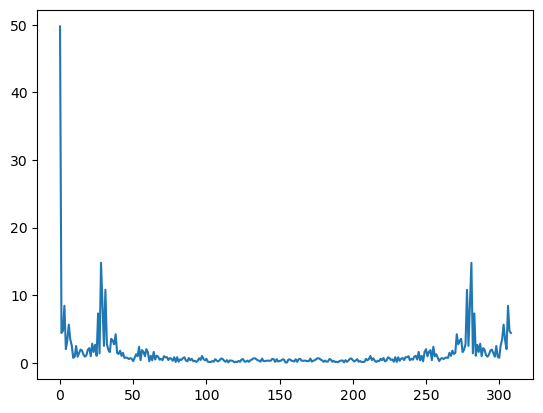

In [2]:
plot(abs(ak[:]))

In [3]:
dt = np.mean(np.diff(year))
nu

309

In [4]:
f_start = argwhere(freq > 0.3)[0, 0]
f_end = argwhere(freq > 0.4)[0, 0] + 1
f_start, f_end

(93, 125)

In [5]:
f_range = freq[f_start:f_end]

In [6]:
i_max = argmax(power[f_start:f_end])

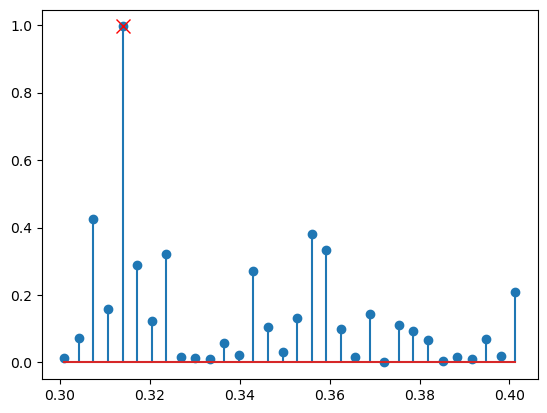

In [7]:
stem(freq[f_start:f_end], power[f_start:f_end])
plot(freq[f_start + i_max], power[f_start + i_max], 'rx', markersize=10)